# Assignment Solutions

In [2]:
# imports
from torchvision.datasets import MNIST
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Use MNIST dataset variable
mnist_data_train = MNIST('/', train=True, download=True)
mnist_data_test = MNIST('/', train=False, download=True)

In [4]:
import numpy as np

def least_squares(A, b):
    """
    Solve the least squares problem Ax = b using the normal equation method.

    Parameters:
    - A: Coefficient matrix
    - b: Target values

    Returns:
    - x: Coefficient vector
    """
    x = np.linalg.inv(A.T @ A) @ A.T @ b
    return x

In [5]:
# Filter samples for classes 1 and 7
def filter_dataset(dataset):
    indices = (dataset.targets == 1) | (dataset.targets == 7)
    images = dataset.data[indices]
    labels = dataset.targets[indices]
    return images, labels

X_train, y_train = filter_dataset(mnist_data_train)
X_test, y_test = filter_dataset(mnist_data_test)

# Assign labels +1 to class 1 and -1 to class 7
y_train = np.where(y_train == 1, 1, -1)
y_test = np.where(y_test == 1, 1, -1)

# Vectorize the data
X_train = X_train.reshape(-1, 28 * 28) / 255.0  # Normalize pixel values to range [0, 1]
X_test = X_test.reshape(-1, 28 * 28) / 255.0

# Split the data into training and testing sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Calculate the weight vector using the Moore-Penrose pseudoinverse
X_train_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
weights = np.linalg.pinv(X_train_with_bias) @ y_train

# Add bias term (a column of 1s) to X_val for the intercept term
X_val_with_bias = np.c_[np.ones((X_val.shape[0], 1)), X_val]

# Predict on the validation set
y_pred = np.sign(X_val_with_bias @ weights)

# Calculate accuracy and confusion matrix for the validation set
accuracy = np.mean(y_pred == y_val)
conf_matrix = np.zeros((2, 2))
for i in range(len(y_val)):
    conf_matrix[y_val[i] >= 0, y_pred[i] >= 0] += 1

print("Validation Accuracy:", accuracy)
print("Validation Confusion Matrix:")
print(conf_matrix)

# Add bias term (a column of 1s) to X_test for the intercept term
X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Predict on the test set
y_pred_test = np.sign(X_test_with_bias @ weights)

# Calculate accuracy and confusion matrix for the test set
accuracy_test = np.mean(y_pred_test == y_test)
conf_matrix_test = np.zeros((2, 2))
for i in range(len(y_test)):
    conf_matrix_test[y_test[i] >= 0, y_pred_test[i] >= 0] += 1

print("Test Accuracy:", accuracy_test)
print("Test Confusion Matrix:")
print(conf_matrix_test)


Validation Accuracy: 0.9888547271329746
Validation Confusion Matrix:
[[1365. 1365.]
 [1365. 1365.]]
Test Accuracy: 0.9875173370319001
Test Confusion Matrix:
[[1132. 1132.]
 [1132. 1132.]]


In [6]:
# Step 1: Generate vectors p and q
# np.random.seed(42)  # for reproducibility
p = np.random.uniform(-10, 10, 100)
q = np.random.uniform(-10, 10, 100)

# Step 2: Generate the target variable b
b = np.where(p * q > 1, 1, -1)

# Step 3: Define basis functions
f0 = np.ones(100)
f1 = p
f2 = q
f3 = p**2
f4 = q**2
f5 = p * q

# Step 4: Create matrix A using the basis functions
A = np.column_stack((f0, f1, f2, f3, f4, f5))

# Step 5: Use least squares to predict the target variable b
x = least_squares(A, b)
print("x:", x)

# Step 6: Calculate the accuracy of the model
b_pred = np.sign(A @ x)
accuracy = np.mean(b_pred == b)
print("Accuracy:", accuracy)

x: [-0.25000687  0.00392318  0.01306796  0.00126772  0.00237084  0.02306977]
Accuracy: 0.89


In [7]:
# Step 1: Generate vectors p and q
# np.random.seed(42)  # for reproducibility
p = np.random.uniform(-1, 1, 100)
q = np.random.uniform(-1, 1, 100)

# Step 2: Generate the target variable b
b = p * q + p**2 + q**2

# Step 3: Define basis functions
f0 = np.ones(100)
f1 = p
f2 = q
f3 = p**2
f4 = q**2
f5 = p * q

# Step 4: Create matrix A using the basis functions
A = np.column_stack((f0, f1, f2, f3, f4, f5))

# Step 5: Use least squares to predict the target variable b
x = least_squares(A, b)

# Step 6: Calculate Mean Squared Error (MSE)
mse = np.mean((A @ x - b)**2)

# Print the results
print("Coefficient vector x:", x)
print("Mean Squared Error (MSE):", mse)

Coefficient vector x: [ 5.13478149e-16 -2.91433544e-16  1.31838984e-16  1.00000000e+00
  1.00000000e+00  1.00000000e+00]
Mean Squared Error (MSE): 1.657395233268247e-31


f1(x) = 1.00 + -3.00x + 4.00x^2
f2(x) = 3.00 + -2.00x + -0.00x^2 + 1.00x^3
f3(x) = 1.00 + 24.00x + -35.00x^2


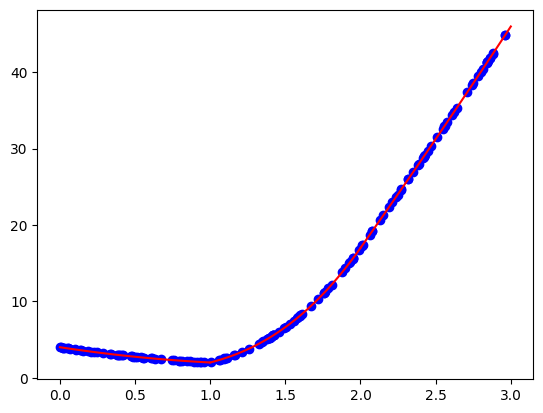

In [9]:
# Read data from CSV
data = pd.read_csv('ques_9_data.csv')

# Convert data to numpy array
data = data.values

# Divide data into three segments based on the constraints
data_seg_1 = data[(data[:, 0] >= 0) & (data[:, 0] <= 1)]
data_seg_2 = data[(data[:, 0] > 1) & (data[:, 0] <= 2)]
data_seg_3 = data[(data[:, 0] > 2) & (data[:, 0] <= 3)]

# Define functions for each segment
def polynomial_f1(params, x):
    return np.polyval(params, x)

def polynomial_f2(params, x):
    return np.polyval(params, x)

def polynomial_f3(params, x):
    return np.polyval(params, x)

# Function to calculate residuals for each segment
def residuals(params, x, y, polynomial):
    return polynomial(params, x) - y

# Perform least squares fitting for each segment
def least_squares_fit(segment, degree):
    x = segment[:, 0]
    y = segment[:, 1]
    
    # Vandermonde matrix
    X = np.vander(x, degree + 1)
    
    # Calculate parameters using the normal equation
    params = np.linalg.lstsq(X, y, rcond=None)[0]
    # convert params to list
    params = params.tolist()
    return params

# Fit polynomials to the segments
params_f1 = least_squares_fit(data_seg_1, 2)  # Degree 2 for segment 1
params_f2 = least_squares_fit(data_seg_2, 3)  # Degree 3 for segment 2
params_f3 = least_squares_fit(data_seg_3, 2)  # Degree 2 for segment 3

# Print the optimized parameters for each segment till 4 decimal places
print('f1(x) = {:.2f} + {:.2f}x + {:.2f}x^2'.format(params_f1[0], params_f1[1], params_f1[2]))
print('f2(x) = {:.2f} + {:.2f}x + {:.2f}x^2 + {:.2f}x^3'.format(params_f2[0], params_f2[1], params_f2[2], params_f2[3]))
print('f3(x) = {:.2f} + {:.2f}x + {:.2f}x^2'.format(params_f3[0], params_f3[1], params_f3[2]))

# plot the data points and the fitted functions
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(data_seg_1[:, 0], data_seg_1[:, 1], color='blue')
plt.scatter(data_seg_2[:, 0], data_seg_2[:, 1], color='blue')
plt.scatter(data_seg_3[:, 0], data_seg_3[:, 1], color='blue')

# Plot the all the fitted functions piecewise
x = np.linspace(0, 1, 100)
y = polynomial_f1(params_f1, x)
plt.plot(x, y, color='red')

x = np.linspace(1, 2, 100)
y = polynomial_f2(params_f2, x)
plt.plot(x, y, color='red')

x = np.linspace(2, 3, 100)
y = polynomial_f3(params_f3, x)
plt.plot(x, y, color='red')

# Show the plot
plt.show()
